In [1]:
import os

In [2]:
os.environ["HTTP_PROXY"] = "http://127.0.0.1:10808"
os.environ["HTTPS_PROXY"] = "http://127.0.0.1:10808"

In [3]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd

model = SentenceTransformer('intfloat/multilingual-e5-large-instruct')

2025-03-08 12:06:22.154296: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741406782.175330  979140 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741406782.181872  979140 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-08 12:06:22.204415: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Plink failed to import tkinter.


In [ ]:
df = pd.read_csv("data/data_random_split.csv")
content_texts = df['content'].tolist()[:128]

# Encode the content column (batch_size is passed to .encode)
content_embeddings = model.encode(
    content_texts,
    batch_size=64,
    show_progress_bar=True,
    normalize_embeddings=True,
)

# Save the resulting embeddings to a .npy file
np.save('embeddings.npy', content_embeddings)

## BGE-m3


In [ ]:
from FlagEmbedding import BGEM3FlagModel

model = BGEM3FlagModel('BAAI/bge-m3',  
                       use_fp16=True) # Setting use_fp16 to True speeds up computation with a slight performance degradation


Plink failed to import tkinter.


2025-03-08 14:33:58.415097: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741415638.436467  982506 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741415638.443044  982506 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-08 14:33:58.465467: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

In [4]:
import pandas as pd

df = pd.read_csv("data/data_random_split.csv")
content_texts = df['content'].tolist()

In [5]:
embeddings = model.encode(
    content_texts, 
    batch_size=32, 
    max_length=8192, # If you don't need such a long length, you can set a smaller value to speed up the encoding process.
)['dense_vecs']

initial target device:   0%|          | 0/2 [00:00<?, ?it/s]

Plink failed to import tkinter.


2025-03-08 14:34:20.539420: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741415660.560055  982787 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741415660.566461  982787 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-08 14:34:20.587373: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
initial target device:  50%|█████     | 1/2 [00:08<00:08,  8.97s/it]

Plink failed to import tkinter.


2025-03-08 14:34:29.444762: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741415669.465437  982945 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741415669.471857  982945 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-08 14:34:29.492732: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
pre tokenize: 100%|██████████| 567/567 [00:15<00:00, 37.60it/s]
You're using a XLMRobertaTokenizerFast tokenizer. Please note

In [ ]:
import numpy as np

np.save('data/bge_embeddings.npy', embeddings)

## Prediction using embeddings

In [ ]:
embeddings = np.load('data/bge_embeddings.npy')

In [50]:
# Sample 1% of the embedding and data

import random

random.seed(42)
sampled_indices = random.sample(range(len(df)), int(len(df) * 0.15))
sampled_embeddings = embeddings[sampled_indices]
sampled_df = df.iloc[sampled_indices]

# tsne visualization
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
sampled_embeddings_2d = tsne.fit_transform(sampled_embeddings)

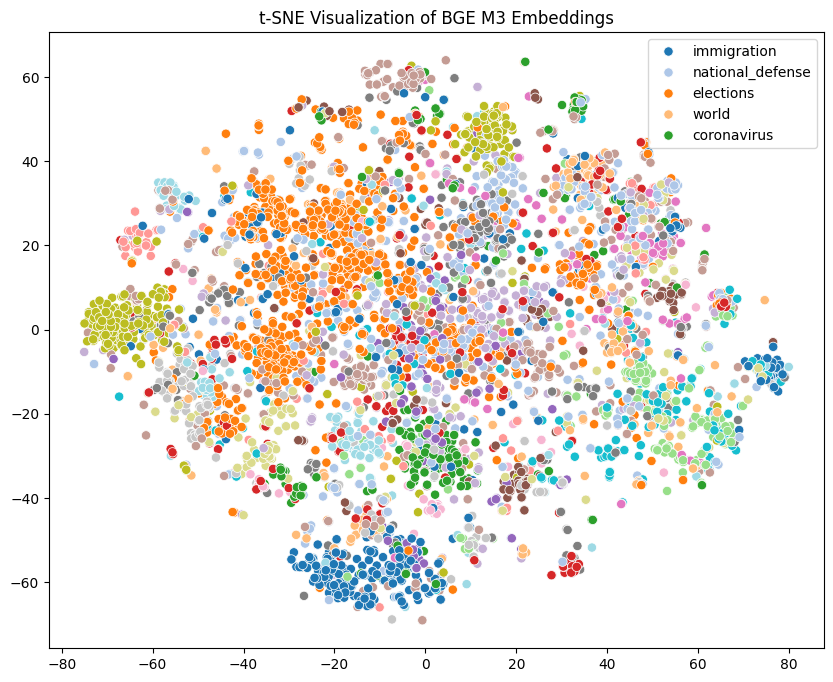

In [ ]:
# Visualize the embeddings, color by df['bias']
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x=sampled_embeddings_2d[:, 0], y=sampled_embeddings_2d[:, 1], hue=sampled_df['topic'], palette='tab20', s=45)

# Keep only top-5 labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:5], labels[0:5])

# Add title
plt.title("t-SNE Visualization of BGE-M3 Embeddings")

plt.show()

In [10]:
X_train = embeddings[df["split"] == "train"]
y_train = df[df["split"] == "train"]["bias"]

X_val = embeddings[df["split"] == "valid"]
y_val = df[df["split"] == "valid"]["bias"]

X_test = embeddings[df["split"] == "test"]
y_test = df[df["split"] == "test"]["bias"]

In [12]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)
print(clf.score(X_val, y_val))

0.6117781589479703


In [13]:
# Classification report
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.45      0.49       402
           1       0.58      0.72      0.64       299
           2       0.66      0.66      0.66       599

    accuracy                           0.61      1300
   macro avg       0.60      0.61      0.60      1300
weighted avg       0.61      0.61      0.60      1300



In [57]:
# Logistic Regression and hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# random search for best hyperparameters
param_rand = {
    'C': [0.001, 0.01, 0.1, 0.5, 1, 10],
    'penalty':('l1', 'l2')
}

rand_search = RandomizedSearchCV(LogisticRegression(random_state=42, solver="saga", max_iter=1000, n_jobs=-1), 
                                 param_rand, cv=2, verbose=2, n_iter=15, n_jobs=-1)
rand_search.fit(X_train, y_train)

print("Best Parameters from Random Search:", rand_search.best_params_)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


/home/dotin13/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=15. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ................................C=0.001, penalty=l1; total time=   0.8s
[CV] END ................................C=0.001, penalty=l1; total time=   0.8s
[CV] END .................................C=0.01, penalty=l1; total time=   4.6s
[CV] END .................................C=0.01, penalty=l1; total time=   4.7s
[CV] END ................................C=0.001, penalty=l2; total time=   8.4s
[CV] END .................................C=0.01, penalty=l2; total time=   8.4s
[CV] END ....................................C=1, penalty=l2; total time=   8.4s
[CV] END ................................C=0.001, penalty=l2; total time=   8.4s
[CV] END ..................................C=0.5, penalty=l2; total time=   8.4s
[CV] END ..................................C=0.5, penalty=l2; total time=   8.4s
[CV] END .................................C=0.01, penalty=l2; total time=   8.4s
[CV] END ....................................C=1, penalty=l2; total time=   8.4s
[CV] END ...................

In [60]:
# evalue the tuned model on the test set
best_logreg = rand_search.best_estimator_
y_pred_logreg = best_logreg.predict(X_test)

In [61]:
# logreg evaluation
print(classification_report(y_test, y_pred_logreg, target_names=['left', 'center', 'right']))

              precision    recall  f1-score   support

        left       0.54      0.46      0.50       402
      center       0.56      0.75      0.64       299
       right       0.69      0.65      0.67       599

    accuracy                           0.61      1300
   macro avg       0.60      0.62      0.60      1300
weighted avg       0.61      0.61      0.61      1300



## Combining semantic and syntactic embeddings

In [62]:
df = pd.read_csv("data/data_random_split.csv")

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from tqdm import tqdm

def tokenize_and_tfidf(df, text_column='content'):
    """
    Tokenizes text using a Transformer tokenizer and applies TF-IDF vectorization.

    Parameters:
    - df (pd.DataFrame): DataFrame containing a column with text data.
    - text_column (str): Column name that contains raw text.
    - model_name (str): Hugging Face model to use for tokenization.

    Returns:
    - tfidf_matrix (sparse matrix): TF-IDF transformed matrix of tokenized text.
    - feature_names (list): List of TF-IDF feature names (tokens).
    """

    # Enable progress bar
    tqdm.pandas()

    # Apply TF-IDF and remove stopwords with automatic tokenizer
    tfidf = TfidfVectorizer(stop_words='english', max_features=3000, min_df=5)
    tfidf_matrix = tfidf.fit_transform(df[text_column])

    return tfidf_matrix, tfidf.get_feature_names_out()

In [64]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# remove numeric tokens in tfidf_df
def remove_numeric_tokens(text):
    return " ".join([word for word in text.split() if not re.fullmatch(r"\d+", word)])

# Apply the function to the 'content' column
df['clean_text'] = df['content'].apply(remove_numeric_tokens)

# Run Tokenization and TF-IDF
tfidf_matrix, feature_names = tokenize_and_tfidf(df, text_column='clean_text')

# Check the shape of the matrix
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

TF-IDF Matrix Shape: (36274, 3000)


In [72]:
# Concatenate the BGE-M3 embeddings with the TF-IDF matrix as a dense matrix
tfidf_dense = tfidf_matrix.toarray()
combined_features = np.concatenate([embeddings, tfidf_dense], axis=1)

In [73]:
combined_features.shape

(36274, 4024)

In [74]:
X_train = combined_features[df["split"] == "train"]
y_train = df[df["split"] == "train"]["bias"]

X_val = combined_features[df["split"] == "valid"]
y_val = df[df["split"] == "valid"]["bias"]

X_test = combined_features[df["split"] == "test"]
y_test = df[df["split"] == "test"]["bias"]

In [75]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)
print(clf.score(X_val, y_val))

0.7136935391652373


In [76]:
# Classification report
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.57      0.59       402
           1       0.63      0.85      0.72       299
           2       0.75      0.66      0.71       599

    accuracy                           0.68      1300
   macro avg       0.67      0.69      0.67      1300
weighted avg       0.68      0.68      0.67      1300



In [85]:
# Apply l1 regularization
clf_l1 = LogisticRegression(random_state=42, max_iter=1000, C=3, penalty='l1', solver='liblinear').fit(X_train, y_train)
print(clf_l1.score(X_val, y_val))

0.7236992567181246


In [86]:
# Classification report
y_pred = clf_l1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.58      0.60       402
           1       0.62      0.82      0.71       299
           2       0.76      0.67      0.72       599

    accuracy                           0.68      1300
   macro avg       0.67      0.69      0.68      1300
weighted avg       0.69      0.68      0.68      1300

